# Hypothesis Test Mini Project for Data Scientist and Artificial Intellegence
In this lab, I will use the stroke datasets from Kaggle to perform hypothesis test. 
source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

## Business Context 

The World Health Organization identifies stroke as a significant global health concern. This analysis aims to explore whether a patient's likelihood of getting a stroke is associated with their BMI. Understanding this association has implications for preventive measures and healthcare strategies.

### Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Business Question
Is there a significant difference in the mean BMI (Body Mass Index) between patients who had a stroke and those who did not?

## Data Pipeline ????

## Data Summary ????

<a name="1"></a>
### Packages 

Let's run the cell below to import all the packages that the lab will need during this assignment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## EDA (Trends/ Insights)

### Datasets

In [2]:
#import data from csv file
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Explore Datasets
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [14]:
# checking data type, they are the right type in the right columns. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
data.shape

(5110, 12)

In [17]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [18]:
#check each columns' unique values. 
def unique(df):
    for column in df.columns:
        print(f'{column}:',df[column].unique())

# drop columns that has mor than 10 unique categorical. 
data_dropped = data.drop(data[['age', 'bmi', 'avg_glucose_level']], axis=1, inplace=False)
unique(data_dropped)

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


### Data Cleaning - Fill in the null values

In [19]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
data[data['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [21]:
# check mean bmi, which is a possible way for imputation
data['bmi'].mean()

28.893236911794666

In [22]:
data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

#### Data engineering - use pd.cut to group the age

In [3]:

age_bins = [0, 12, 18, 35, 50, 65, 120]
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-Aged Adults', 'Senior Adults', 'Elderly']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior Adults
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-Aged Adults
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [29]:
data['bmi'].max()

97.6

In [24]:
data.groupby('gender')['bmi'].mean()
# gender didn't show big difference in bmi, however, other shows a gap from female and male. what is the reason?

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [25]:
data[data['gender']=='Other']
# there is only one record in this category. that explain the reason. 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Young Adults


In [26]:
# check age mean bmi. it has a big impact in age. therefore, group age into category for imputation. 
data.groupby('age')['bmi'].mean()

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

In [27]:
data.groupby('age_group')['bmi'].mean()

age_group
Children              19.374216
Teenagers             25.898754
Young Adults          29.131342
Middle-Aged Adults    31.397812
Senior Adults         31.670699
Elderly               29.415118
Name: bmi, dtype: float64

In [4]:
data_clean = data.copy()
data_clean['bmi'] = data['bmi'].fillna(data.groupby('age_group')['bmi'].transform('mean').round(1))
data_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.7,never smoked,1,Senior Adults
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-Aged Adults
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [5]:
data_clean['bmi'].isnull().sum()

0

## Bmi Group

In [5]:
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['underweight', 'normalweight', 'overweight', 'obese']
data_clean['bmi_group'] = pd.cut(data_clean['bmi'], bins=bmi_bins, labels=bmi_labels)
data_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly,obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.7,never smoked,1,Senior Adults,obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly,obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-Aged Adults,obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly,normalweight


In [29]:
data_clean['bmi_group'].value_counts(normalize=True)

bmi_group
obese           0.385910
overweight      0.296869
normalweight    0.248924
underweight     0.068297
Name: proportion, dtype: float64

In [30]:
data_clean['stroke'].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [76]:
data_clean['hypertension'].value_counts(normalize=True)

hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

In [77]:
data_clean['heart_disease'].value_counts(normalize=True)

heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

In [78]:
data_clean['avg_glucose_level'].max()

271.74

In [6]:
import pandas as pd

# Assuming 'data_clean' is your DataFrame
# Define the bin edges and labels
bin_edges = [0,125, float('inf')]  # Adjust the bin edges as needed
bin_labels = ['no diabetes', 'Diabetes']


# Create a new column 'glucose_level_group' based on the grouping
data_clean['glucose_level_group'] = pd.cut(data_clean['avg_glucose_level'], bins=bin_edges, labels=bin_labels, right=False)

# Display the first few rows of the DataFrame with the new column
print(data_clean[['avg_glucose_level', 'glucose_level_group']].head())


   avg_glucose_level glucose_level_group
0             228.69            Diabetes
1             202.21            Diabetes
2             105.92         no diabetes
3             171.23            Diabetes
4             174.12            Diabetes


In [107]:
data_clean['glucose_level_group'].value_counts(normalize=True)

glucose_level_group
no diabetes    0.804305
Diabetes       0.195695
Name: proportion, dtype: float64

### Visualization

#### Distribution of BMI

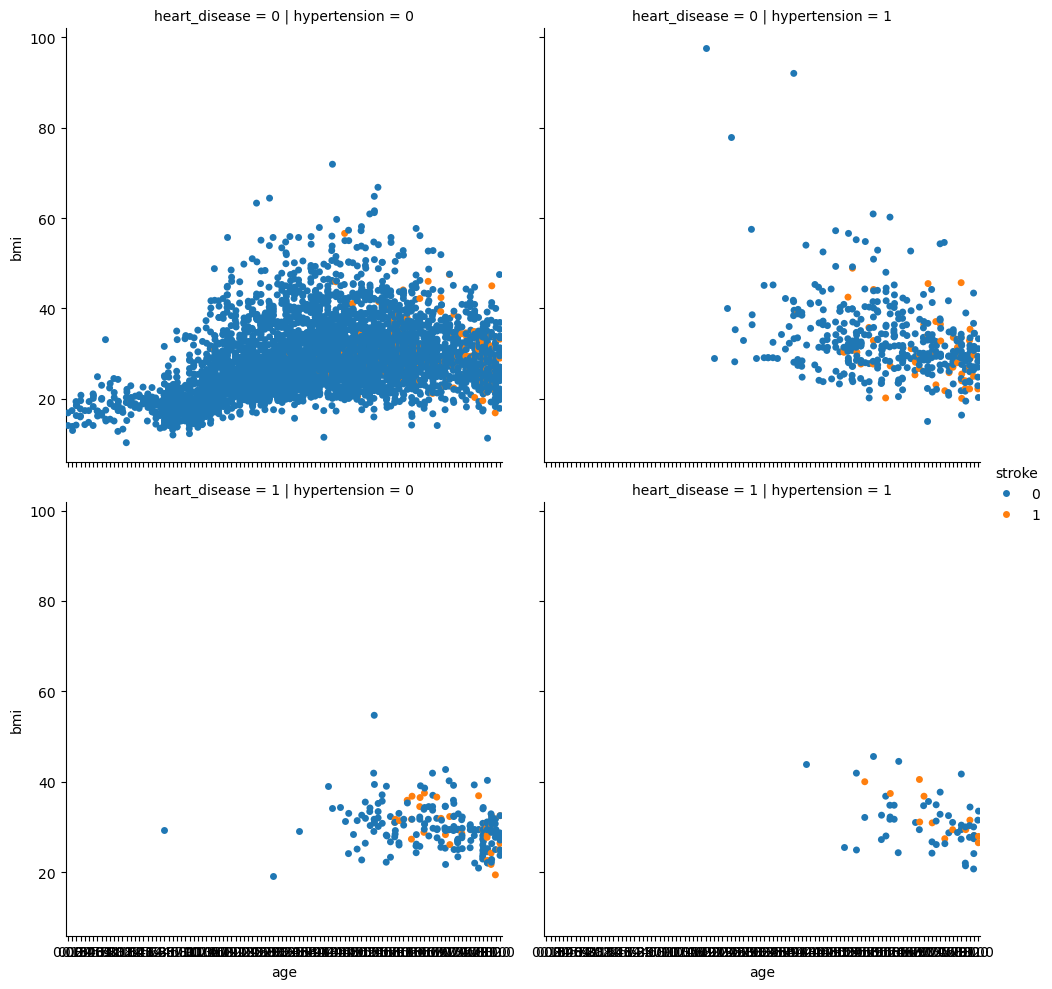

In [10]:
sns.catplot(data_clean,
           x='age',
           y='bmi',
           row='heart_disease',
           col='hypertension',
           hue='stroke')

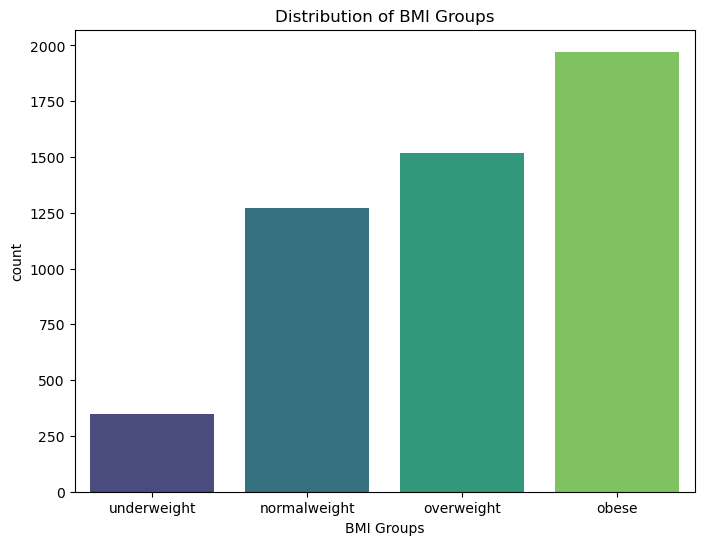

In [40]:
# Step 1: Distribution of BMI Groups
plt.figure(figsize=(8, 6))
sns.countplot(x='bmi_group', data=data_clean, palette='viridis')
plt.title('Distribution of BMI Groups')
plt.xlabel('BMI Groups')
plt.ylabel('count')
plt.show()

In [82]:
def distribution(df, column):
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], bins = 30, kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Freguency')
    plt.show()

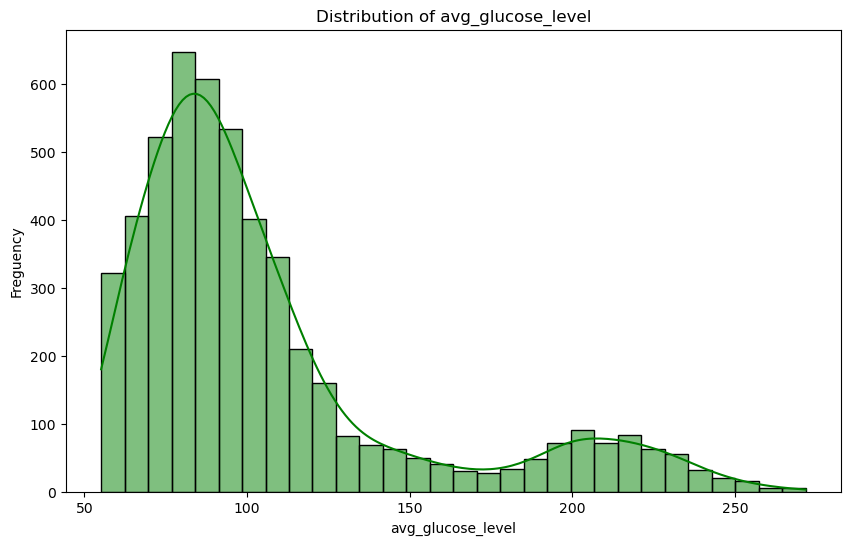

In [85]:
distribution(data_clean, 'avg_glucose_level')

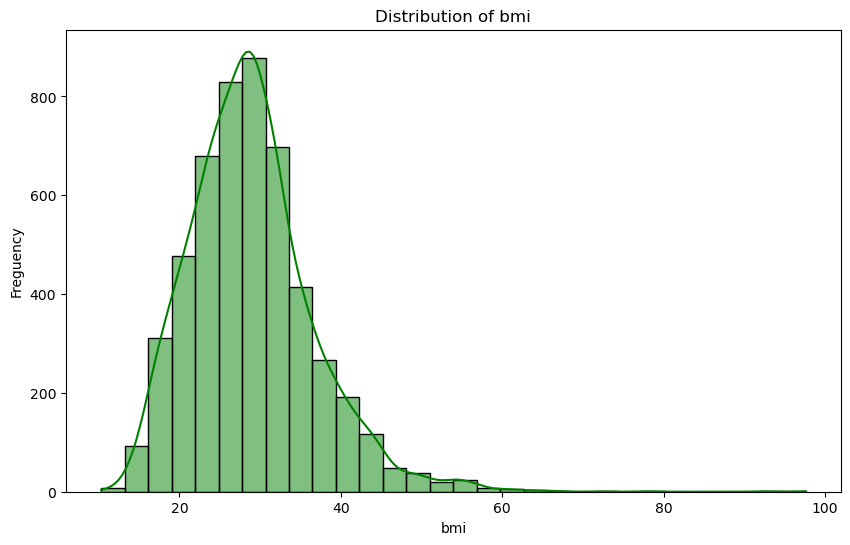

In [83]:
distribution(data_clean, 'bmi')

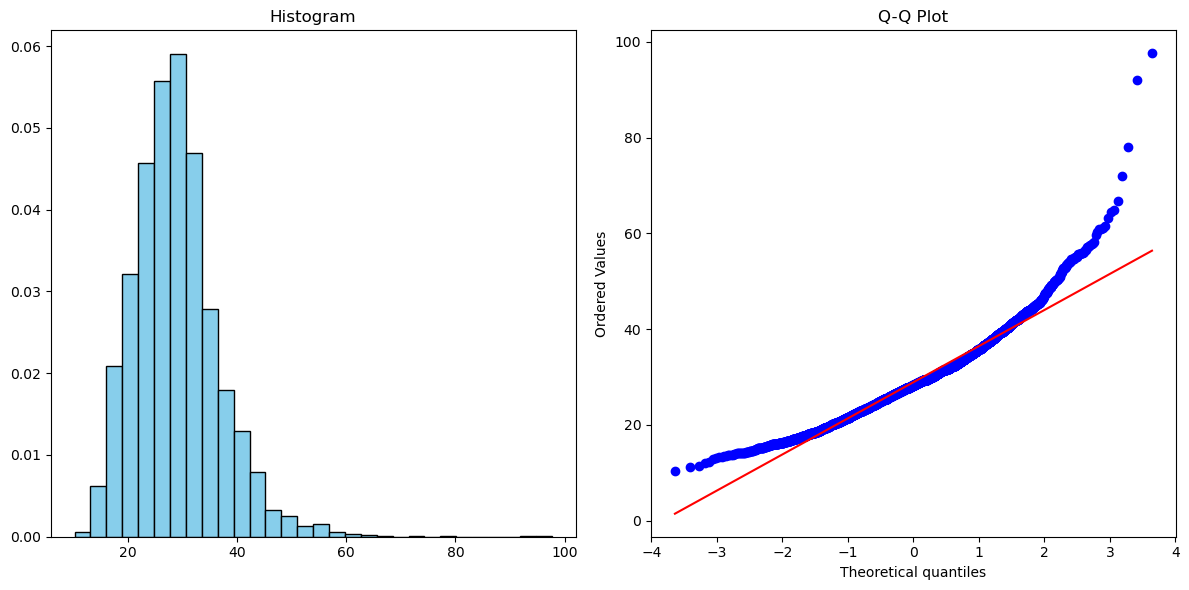

In [61]:
from scipy.stats import probplot
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data_clean['bmi'], bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram')

# Q-Q Plot
plt.subplot(1, 2, 2)
probplot(data_clean['bmi'], dist='norm', plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

##### Check skewness

In [18]:
data_clean['bmi'].skew()

1.05444117783197

##### Log transformation np.log1p(x) = loge(1+x)

In [15]:
data_clean['log_bmi'] = np.log1p(data_clean['bmi'])

In [81]:
data_clean['log_bmi'].skew()

0.006196573354242121

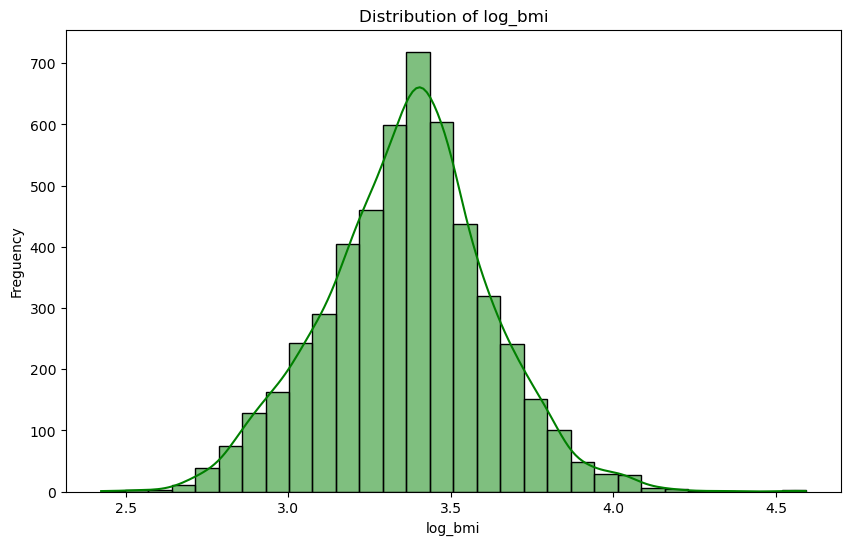

In [86]:
distribution(data_clean, 'log_bmi')

#### BMI and stroke Status

In [48]:
data_clean['stroke'].unique()

array([1, 0])

In [24]:
data_clean['stroke_cat'] = data_clean['stroke'].astype(str)

In [55]:
data_clean['stroke_cat'].dtype

dtype('O')

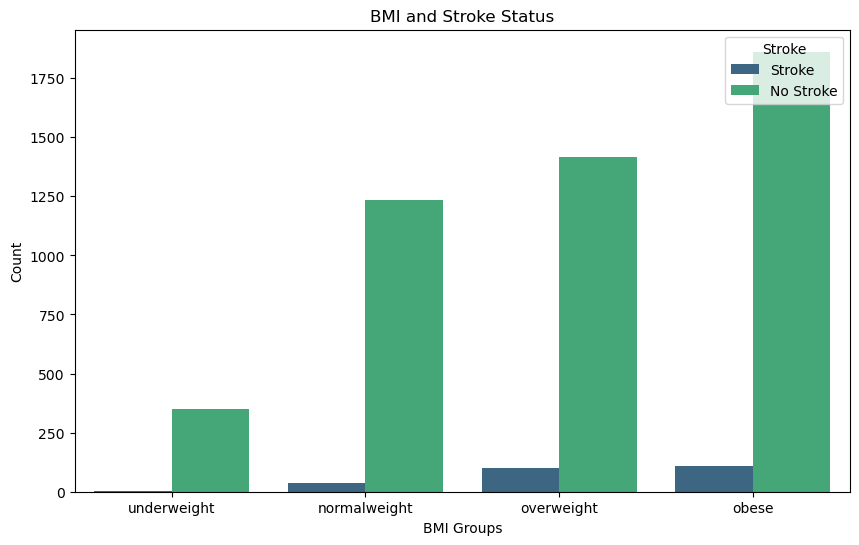

In [26]:
# Step 2: BMI and Stroke Status



plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_group', hue='stroke_cat', data=data_clean, palette='viridis')
plt.title('BMI and Stroke Status')
plt.xlabel('BMI Groups')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['Stroke', 'No Stroke'])
plt.show()

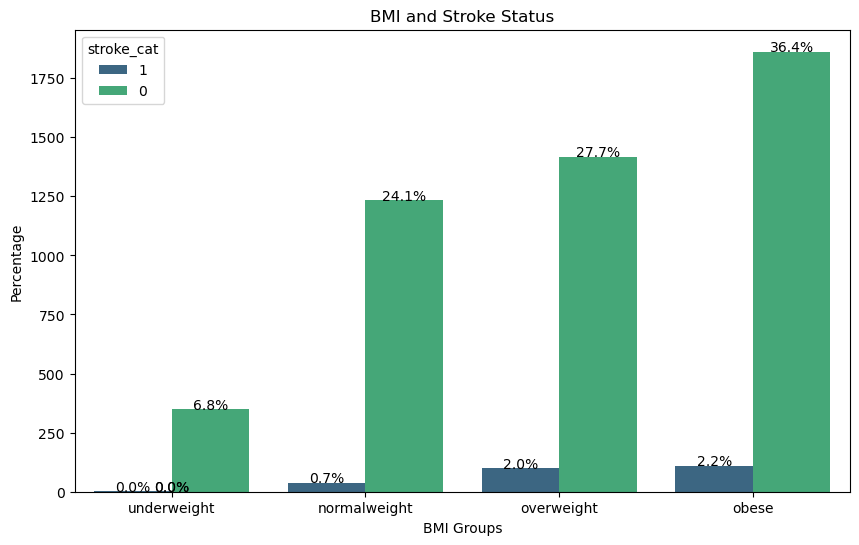

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bmi_group' and 'stroke_cat' are columns in your DataFrame
plt.figure(figsize=(10, 6))

# Create a countplot
ax = sns.countplot(x='bmi_group', hue='stroke_cat', data=data_clean, palette='viridis')

# Annotate bars with percentage values
total = len(data_clean)  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.1%}', ha='center')

# Set plot labels and title
plt.title('BMI and Stroke Status')
plt.xlabel('BMI Groups')
plt.ylabel('Percentage')
#plt.legend(title='Stroke', loc='upper right', labels=['Stroke', 'No Stroke'])
plt.show()

<Axes: xlabel='stroke', ylabel='log_bmi'>

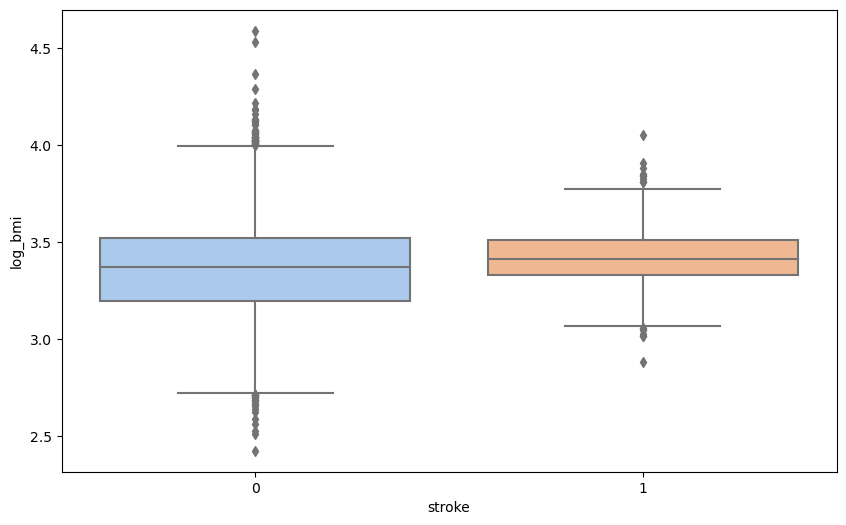

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='log_bmi', data=data_clean, palette='pastel')

#### BMI and Age Relationship

In [22]:
data_clean['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [21]:
data_clean[['bmi_group', 'age']].sample(10)

,bmi_group,age
2262,obese,28.0
1848,normalweight,37.0
611,overweight,42.0
3053,obese,29.0
3742,obese,71.0
3442,obese,32.0
1721,normalweight,43.0
1844,obese,25.0
3062,obese,56.0
4965,underweight,11.0


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
def visual_cat(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='stroke', data=data_clean, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='stroke')
    plt.show()

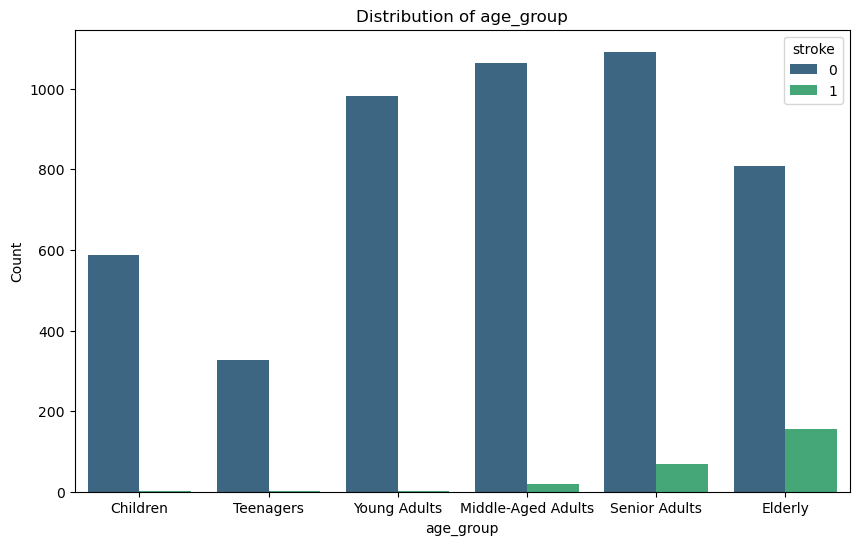

In [56]:
visual_cat('age_group')

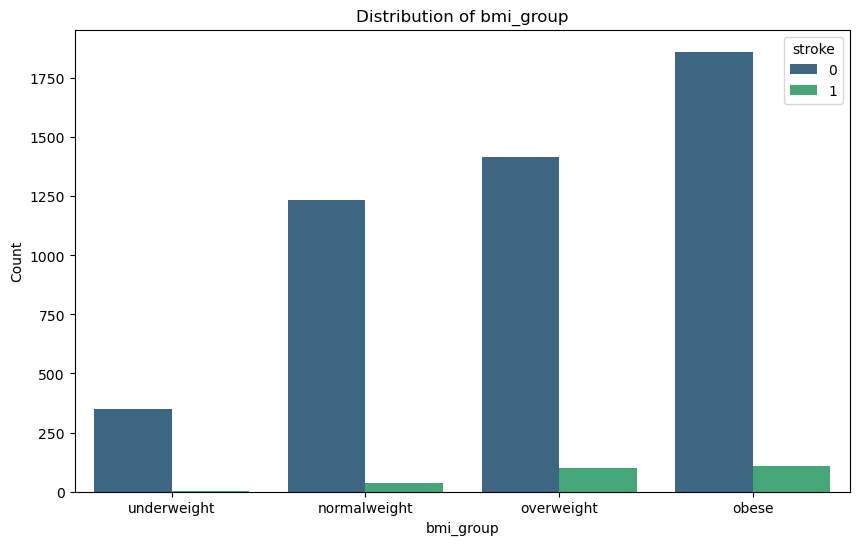

In [57]:
visual_cat('bmi_group')

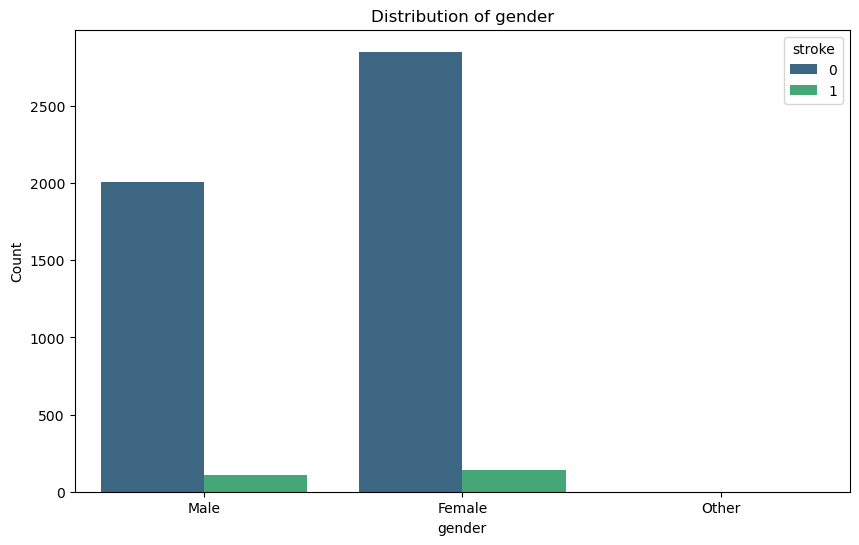

In [62]:
visual_cat('gender')

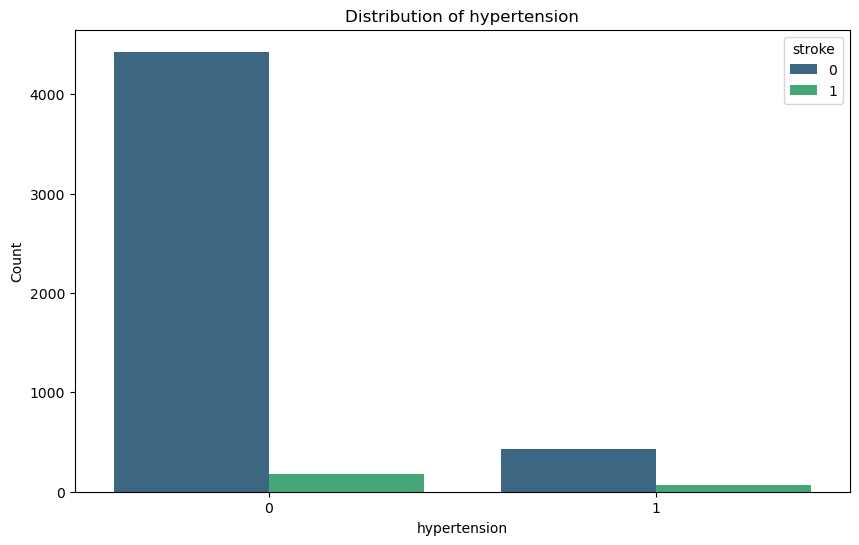

In [63]:
visual_cat('hypertension')

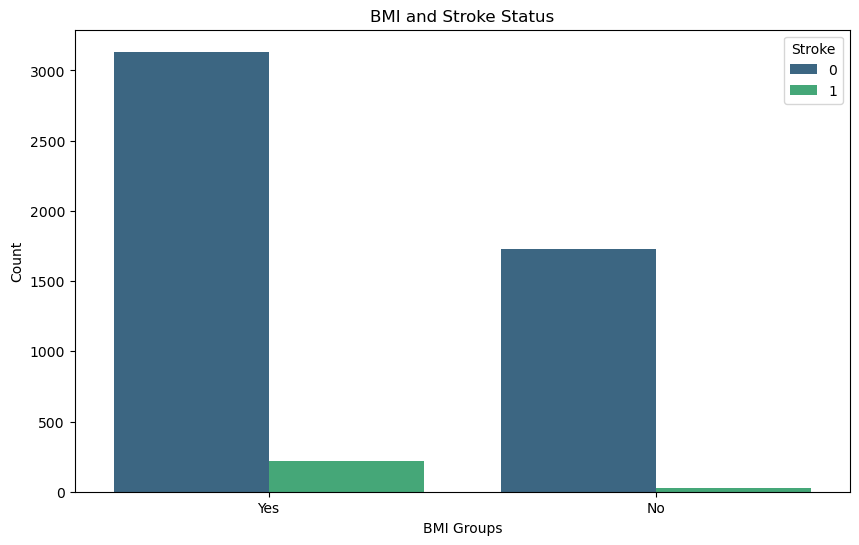

In [44]:
visual_cat('ever_married')

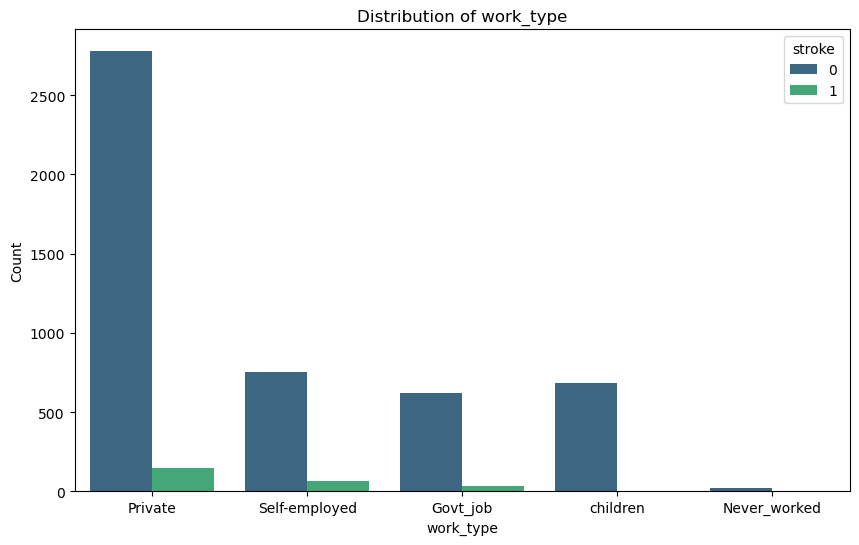

In [73]:
visual_cat('work_type')

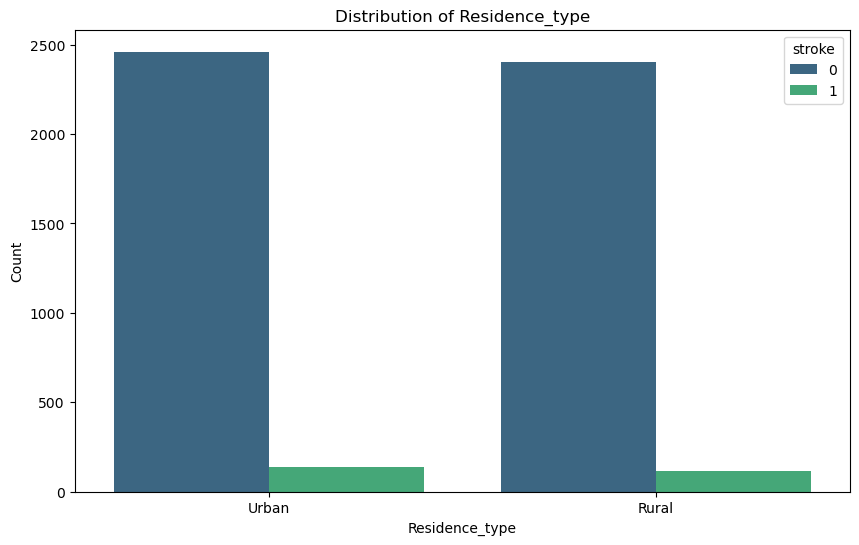

In [74]:
visual_cat('Residence_type')

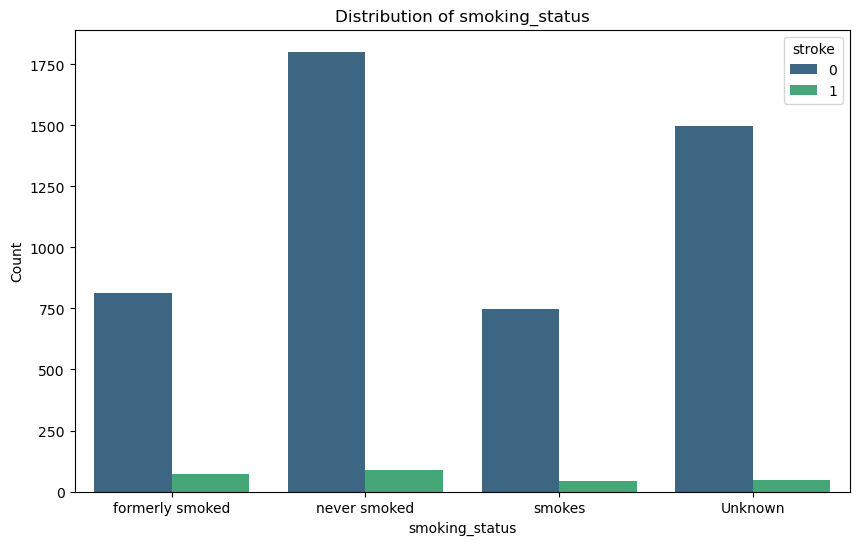

In [75]:
visual_cat('smoking_status')

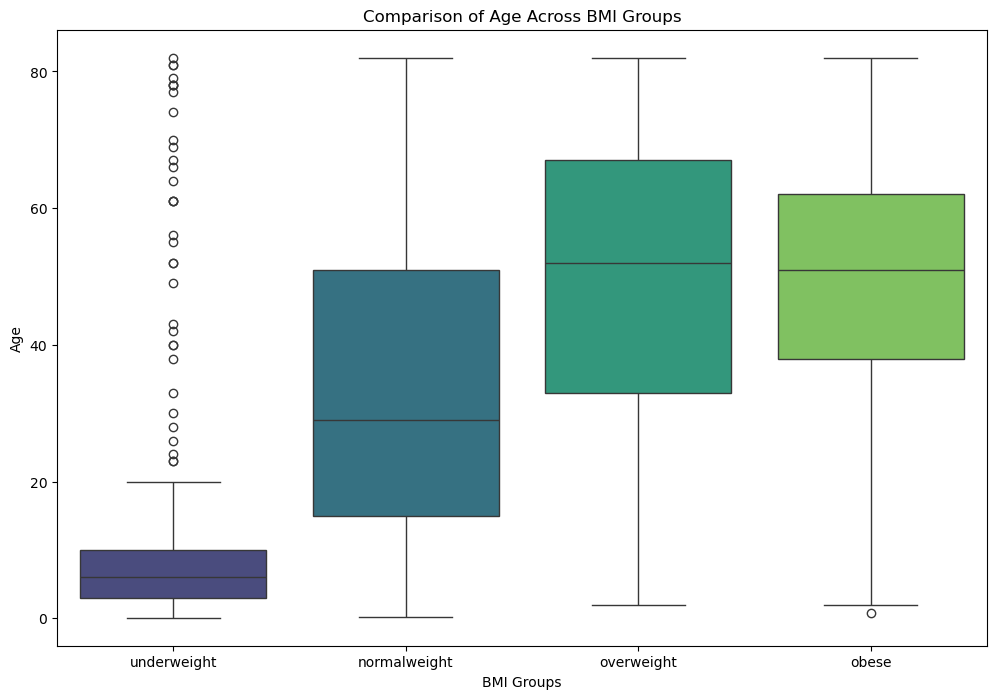

In [6]:
# Step 3: Comparative Box Plots - Age.
plt.figure(figsize=(12, 8))
sns.boxplot(x='bmi_group', y='age', data=data_clean, palette='viridis')
plt.title('Comparison of Age Across BMI Groups')
plt.xlabel('BMI Groups')
plt.ylabel('Age')
plt.show()

In [124]:
data_clean['bmi'].corr(data_clean['age'])

0.3347341788219646

In [125]:
data_clean['log_bmi'].corr(data_clean['age'])

0.4018720600441188

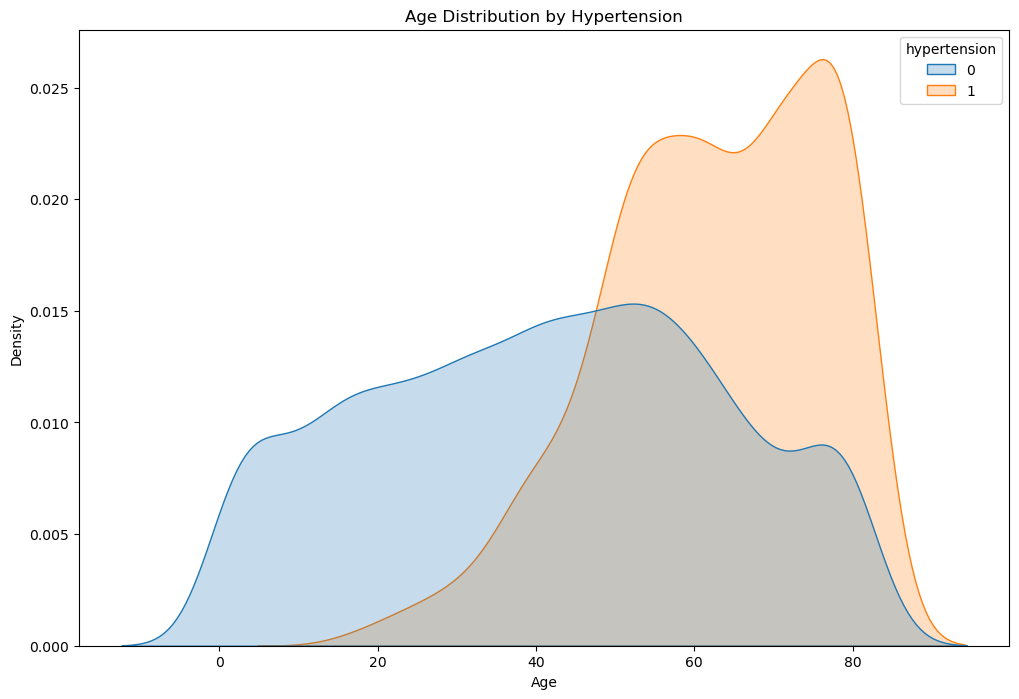

In [132]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='age', hue='hypertension', data=data_clean, fill=True, common_norm=False)
plt.title('Age Distribution by Hypertension')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [139]:
# Statistical findings for Age
mean_age_no_hypertension = data_clean[data_clean['hypertension'] == 0]['age'].mean()
mean_age_hypertension = data_clean[data_clean['hypertension'] == 1]['age'].mean()

percentage_old_age_hypertension = (len(data_clean[(data_clean['hypertension'] == 1) & (data_clean['age'] > 60)]) / len(data_clean[data_clean['hypertension'] == 1])) * 100
print(f"Mean Age (No Hypertension): {mean_age_no_hypertension}")
print(f"Mean Age (Hypertension): {mean_age_hypertension}")
print(f"Percentage of Hypertension with Age > 60: {percentage_old_age_hypertension}%")

Mean Age (No Hypertension): 41.17302688638335
Mean Age (Hypertension): 62.24497991967871
Percentage of Hypertension with Age > 60: 56.62650602409639%


In [138]:
mean_bmi_no_hypertension = data_clean[data_clean['hypertension'] == 0]['bmi'].mean()
mean_bmi_hypertension = data_clean[data_clean['hypertension'] == 1]['bmi'].mean()

percentage_high_bmi_hypertension = (len(data_clean[(data_clean['hypertension'] == 1) & (data_clean['bmi'] > 30)]) / len(data_clean[data_clean['hypertension'] == 1])) * 100

print(f"Mean BMI (No Hypertension): {mean_bmi_no_hypertension}")
print(f"Mean BMI (Hypertension): {mean_bmi_hypertension}")
print(f"Percentage of Hypertension with BMI > 30: {percentage_high_bmi_hypertension}%")

Mean BMI (No Hypertension): 28.496921075455333
Mean BMI (Hypertension): 32.76526104417671
Percentage of Hypertension with BMI > 30: 58.032128514056225%


In [140]:
# Statistical findings for BMI and Heart Disease
mean_bmi_no_heart_disease = data_clean[data_clean['heart_disease'] == 0]['bmi'].mean()
mean_bmi_heart_disease = data_clean[data_clean['heart_disease'] == 1]['bmi'].mean()

percentage_high_bmi_heart_disease = (len(data_clean[(data_clean['heart_disease'] == 1) & (data_clean['bmi'] > 30)]) / len(data_clean[data_clean['heart_disease'] == 1])) * 100
print("### Heart Disease ###")
print(f"Mean BMI (No Heart Disease): {mean_bmi_no_heart_disease}")
print(f"Mean BMI (Heart Disease): {mean_bmi_heart_disease}")
print(f"Percentage of Heart Disease with BMI > 30: {percentage_high_bmi_heart_disease}%")


### Heart Disease ###
Mean BMI (No Heart Disease): 28.83396772858916
Mean BMI (Heart Disease): 30.295289855072465
Percentage of Heart Disease with BMI > 30: 46.73913043478261%


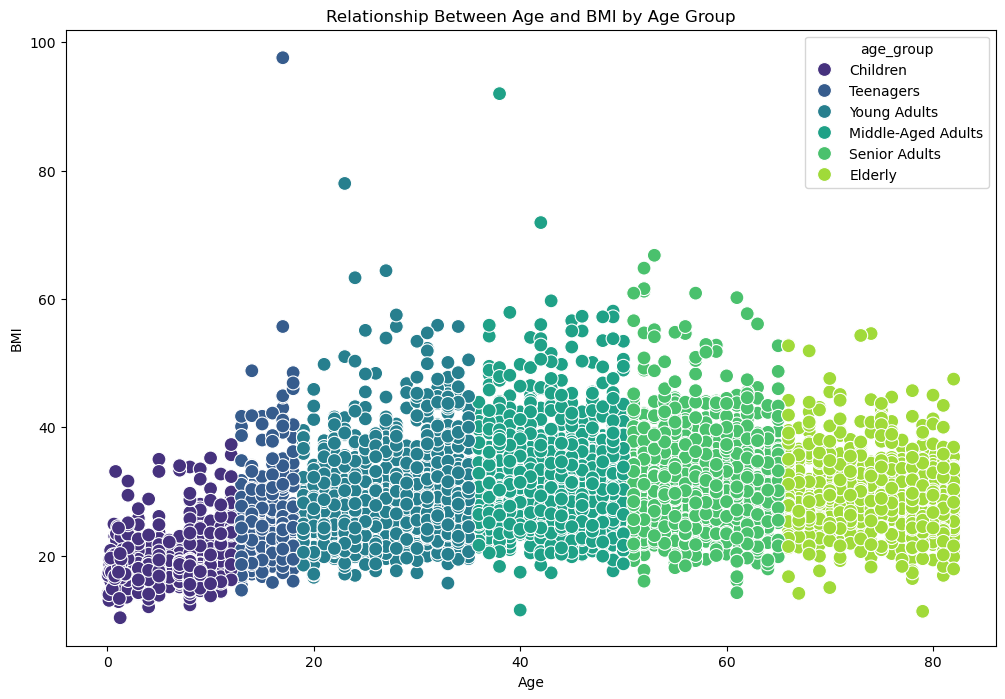

In [141]:
plt.figure(figsize=(12, 8))

# Create a scatter plot with different colors for each age group
sns.scatterplot(x='age', y='bmi', hue='age_group', data=data_clean, palette='viridis', s=100)

# Add labels and title
plt.title('Relationship Between Age and BMI by Age Group')
plt.xlabel('Age')
plt.ylabel('BMI')

# Show the plot
plt.show()


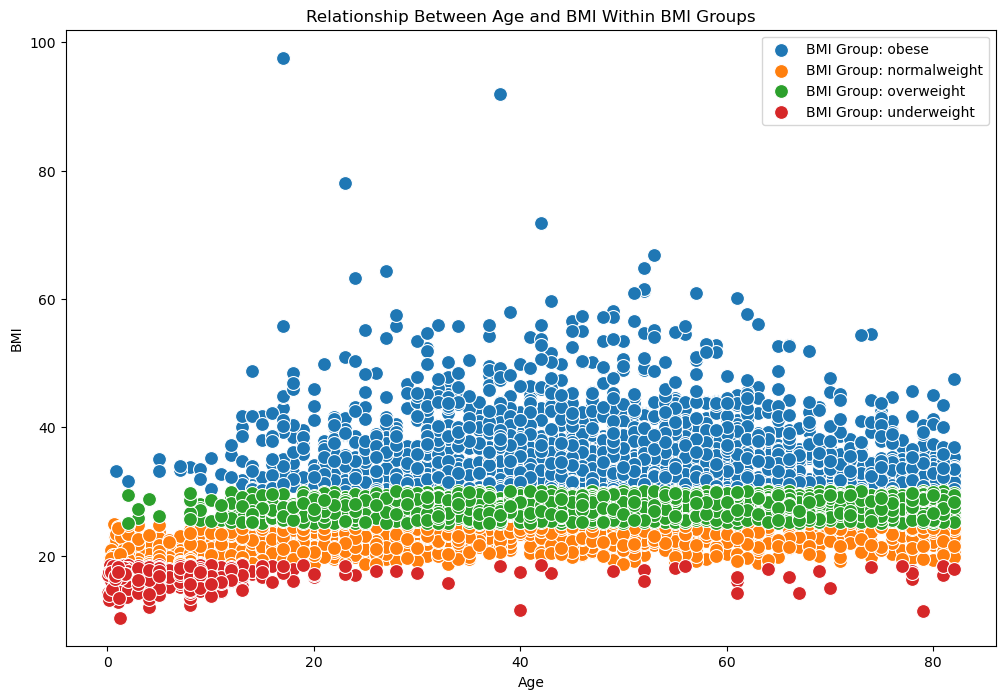

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_clean' is your DataFrame with 'age_group' and 'bmi_group' columns

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create scatter plots for each BMI group
for bmi_group in data_clean['bmi_group'].unique():
    subset = data_clean[data_clean['bmi_group'] == bmi_group]
    sns.scatterplot(x='age', y='bmi', data=subset, label=f'BMI Group: {bmi_group}', s=100)

# Add labels and title
plt.title('Relationship Between Age and BMI Within BMI Groups')
plt.xlabel('Age')
plt.ylabel('BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [134]:
def bmi_age(column):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='age', y=column, hue='stroke', data=data_clean, palette='Set2', alpha=0.5)
    plt.title(f'{column} and Age Relationship')
    plt.xlabel('Age')
    plt.ylabel(column)
    plt.show()

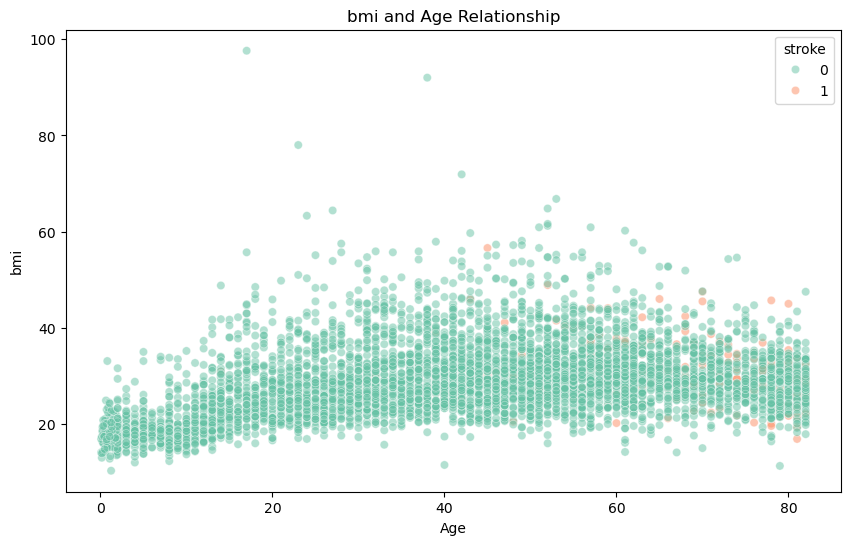

In [135]:
bmi_age('bmi')

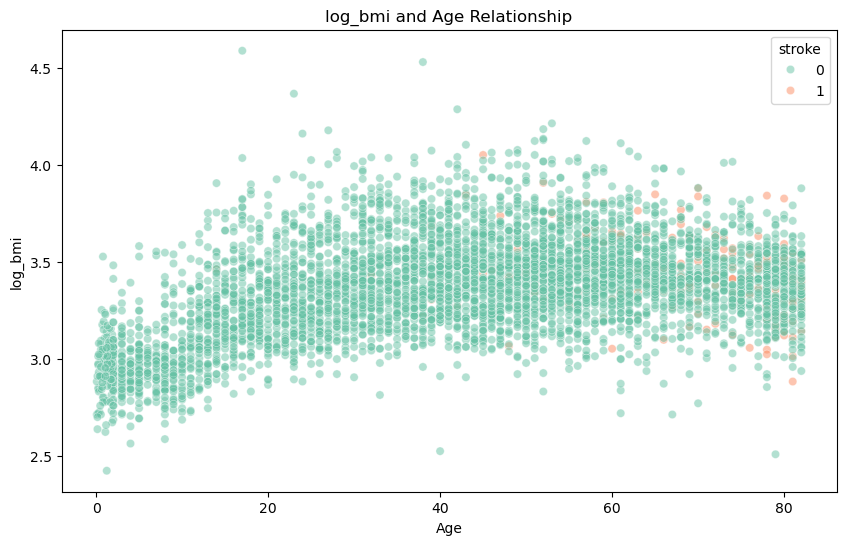

In [137]:
bmi_age('log_bmi')

#### BMI and Other Health Factors

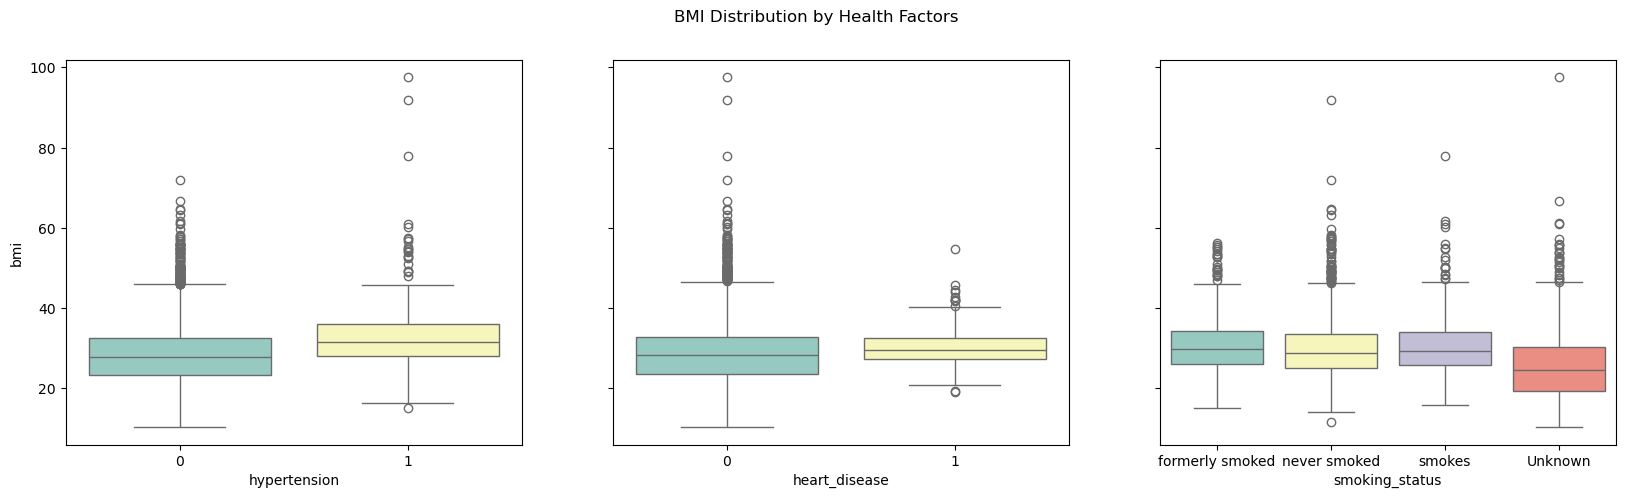

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
sns.boxplot(x='hypertension', y='bmi', data=data_clean, ax=axes[0], palette='Set3')
sns.boxplot(x='heart_disease', y='bmi', data=data_clean, ax=axes[1], palette='Set3')
sns.boxplot(x='smoking_status', y='bmi', data=data_clean, ax=axes[2], palette='Set3')
fig.suptitle('BMI Distribution by Health Factors')
plt.show()

#### Correlation Heatmap

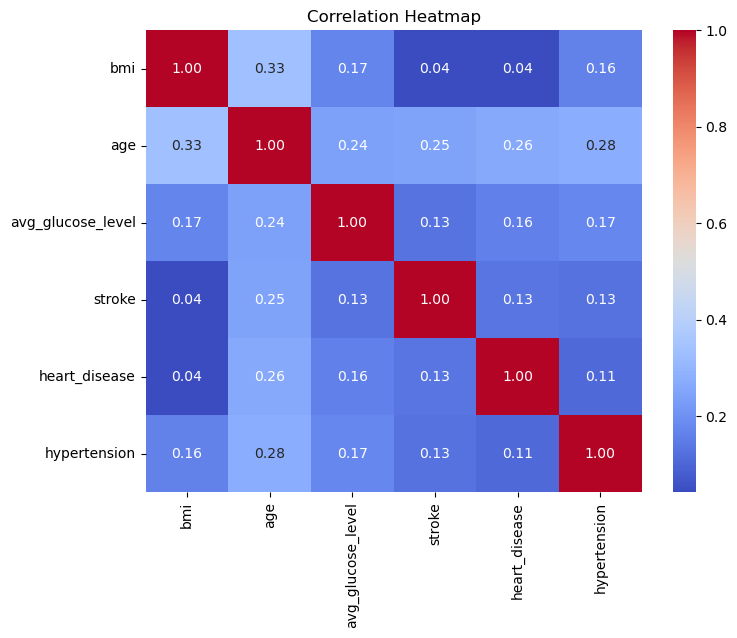

In [154]:
correlation_matrix = data_clean[['bmi', 'age', 'avg_glucose_level', 'stroke', 'heart_disease', 'hypertension']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Risk Factors Analysis

In [63]:
data_clean['hypertension_str'] = data_clean['hypertension'].astype(str)

In [89]:
def age_other(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x='age_group', hue=column, data=data_clean, palette='viridis')
    plt.title(f'{column} Distribution Across Age Groups')
    plt.xlabel('Age Groups')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()

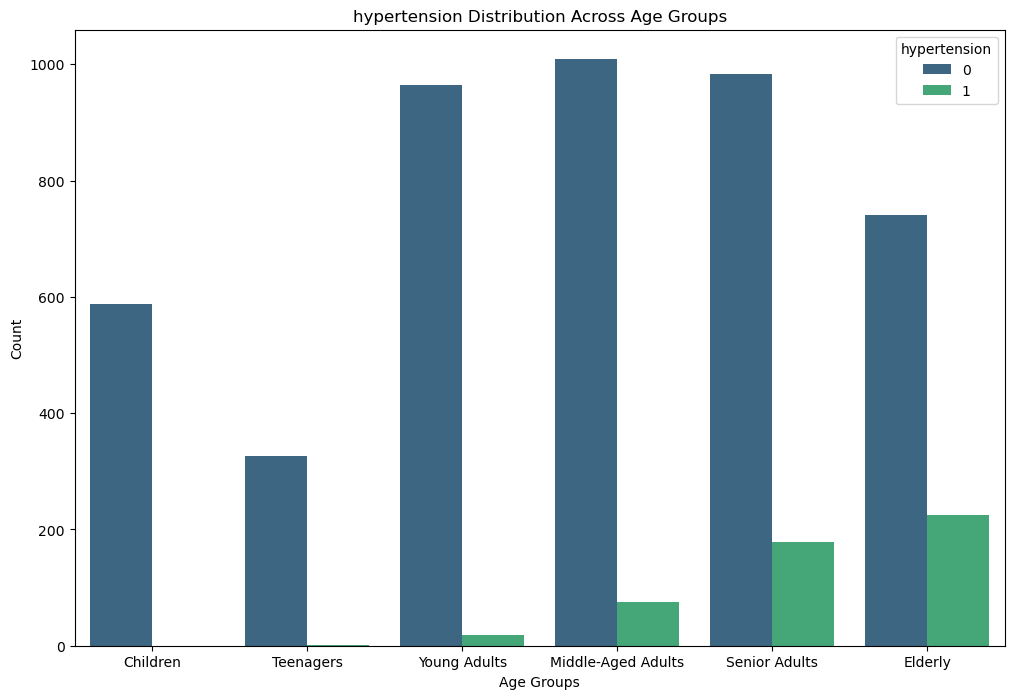

In [90]:
age_other('hypertension')

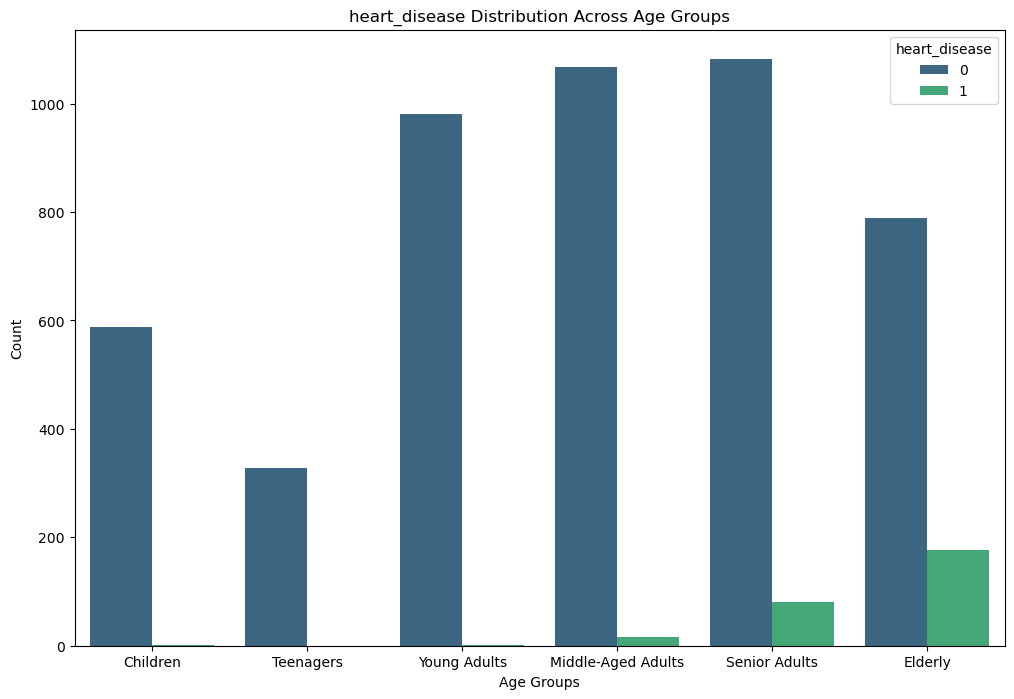

In [91]:
age_other('heart_disease')

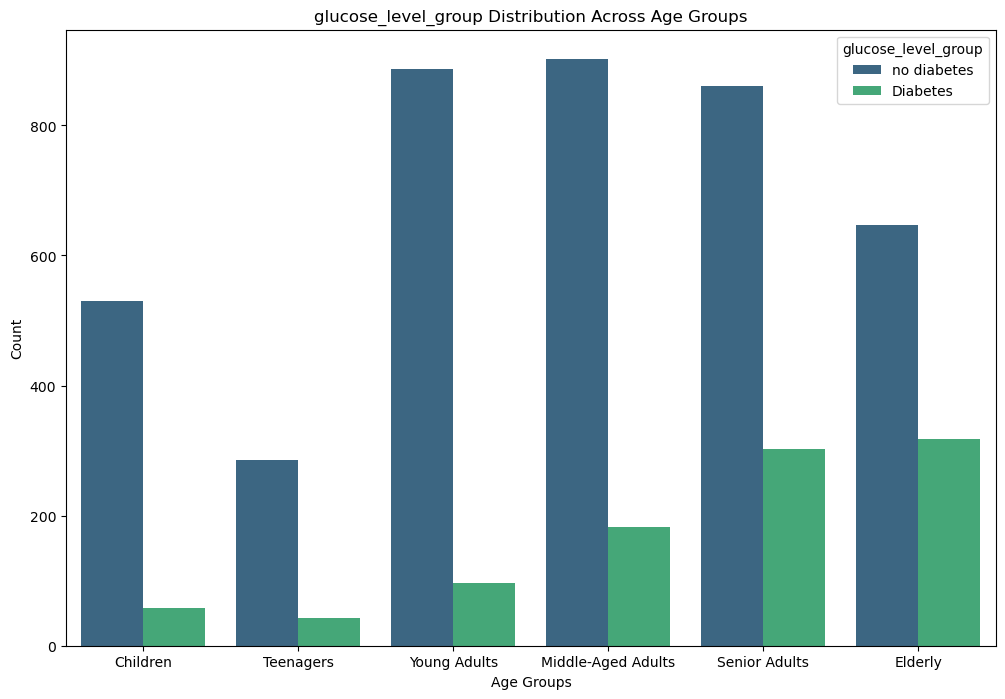

In [108]:
age_other('glucose_level_group')

In [99]:
data_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,log_bmi,bmi_group_normalized,stroke_cat,glucose_level_group,log_glucose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly,obese,3.627004,1.0,1,Diabetes,5.436731
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.7,never smoked,1,Senior Adults,obese,3.487375,1.0,1,Diabetes,5.314240
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly,obese,3.511545,1.0,1,Prediabetes,4.672081
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-Aged Adults,obese,3.566712,1.0,1,Diabetes,5.148831
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly,normalweight,3.218876,1.0,1,Diabetes,5.165471


In [64]:
def bmi_other(column):
    plt.figure(figsize=(12, 8))
    sns.countplot(x='bmi_group', hue=column, data=data_clean, palette='viridis')
    plt.title(f'{column} Distribution Across BMI Groups')
    plt.xlabel('BMI Groups')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()

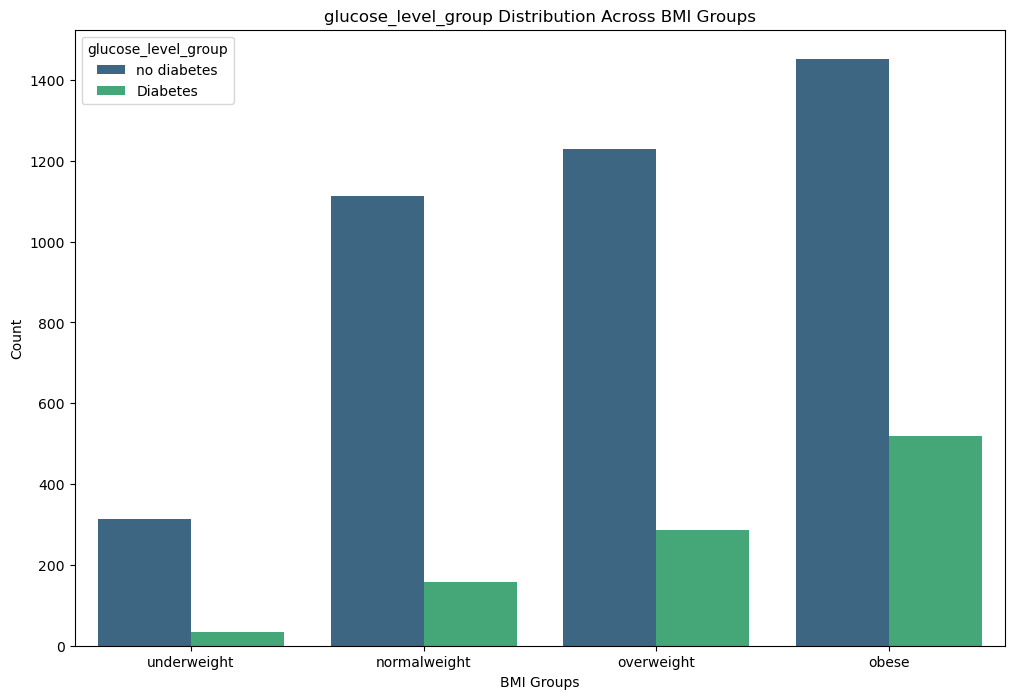

In [109]:
bmi_other('glucose_level_group')

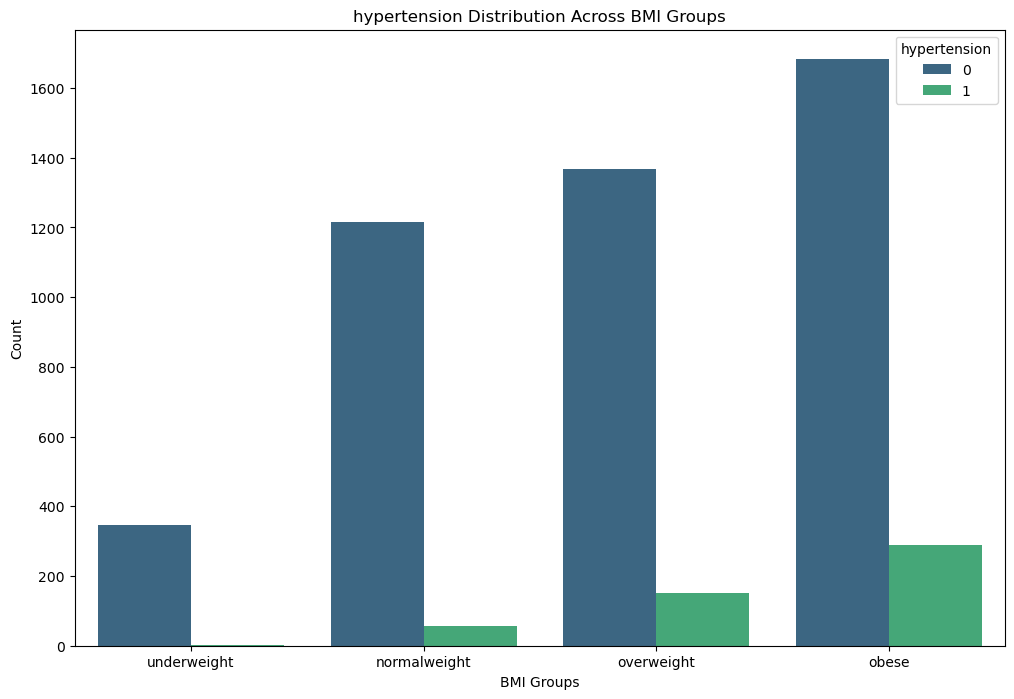

In [65]:
bmi_other('hypertension')

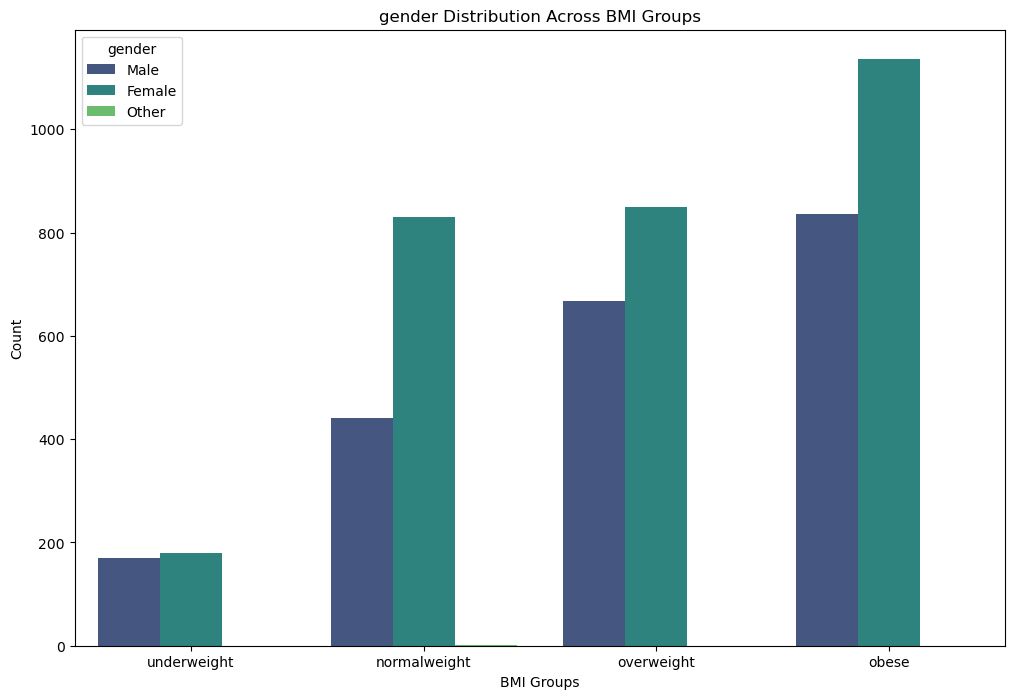

In [66]:
bmi_other('gender')

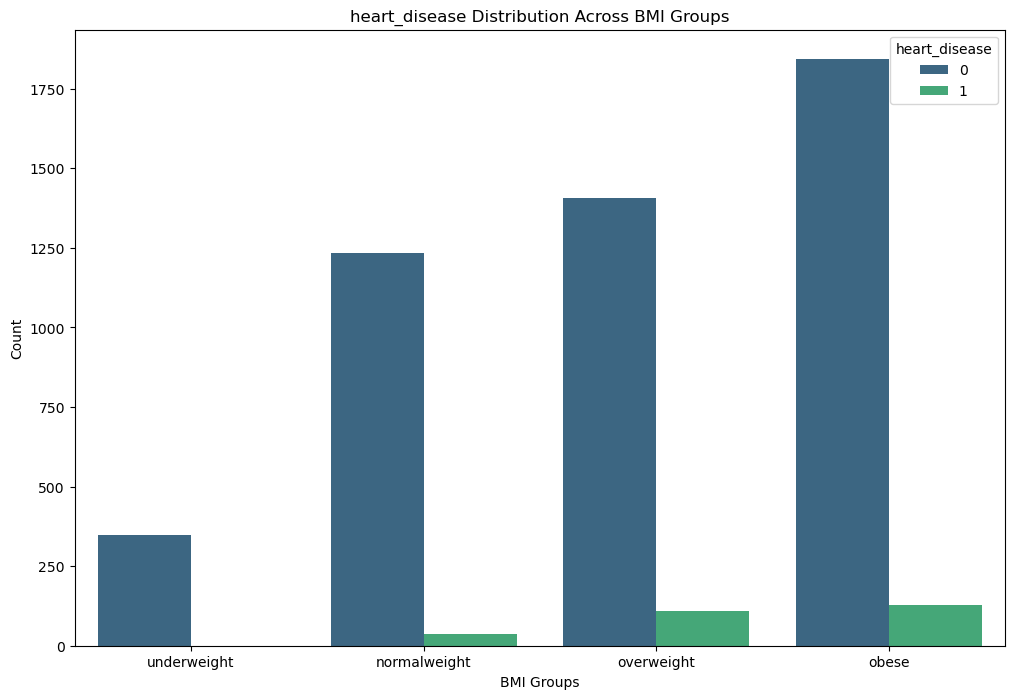

In [68]:
bmi_other('heart_disease')

In [67]:
data_clean['gender'].value_counts(normalize=True)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

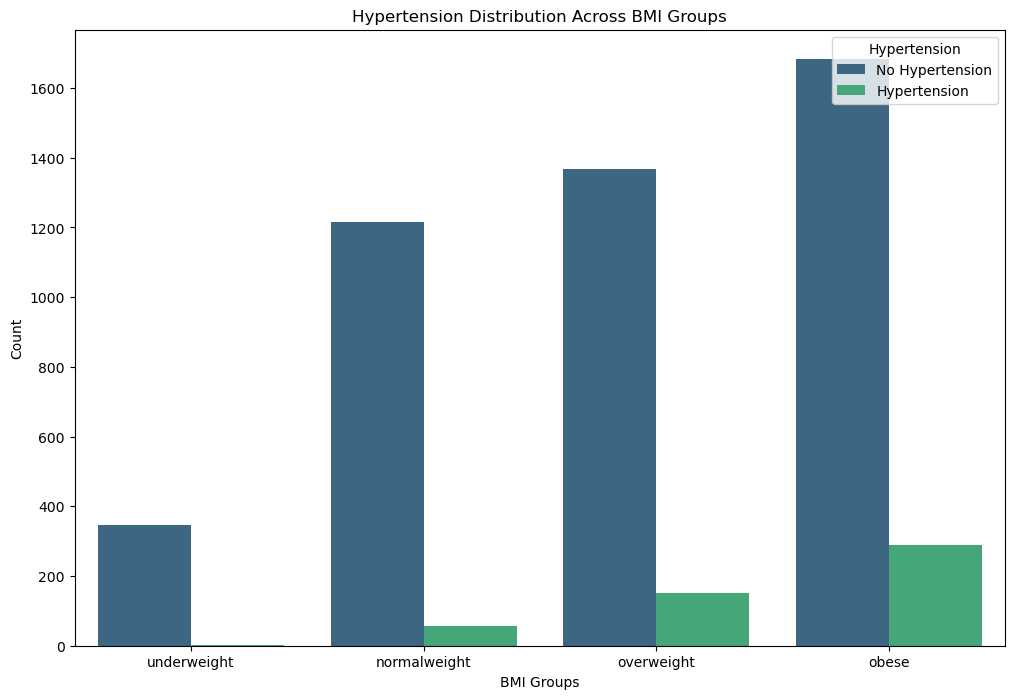

In [65]:
#Risk Factors Analysis
plt.figure(figsize=(12, 8))
sns.countplot(x='bmi_group', hue='hypertension_str', data=data_clean, palette='viridis')
plt.title('Hypertension Distribution Across BMI Groups')
plt.xlabel('BMI Groups')
plt.ylabel('Count')
plt.legend(title='Hypertension', loc='upper right', labels=['No Hypertension', 'Hypertension'])
plt.show()

In [70]:
data_clean['heart_disease_str'] = data_clean['heart_disease'].astype(str)

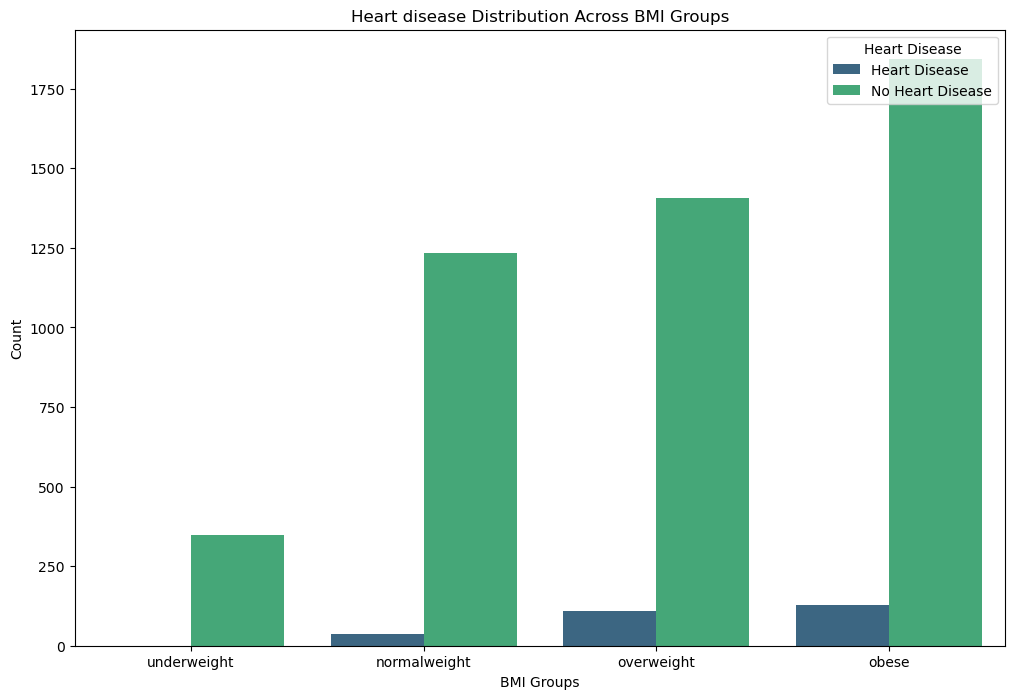

In [73]:
#Risk Factors Analysis
plt.figure(figsize=(12, 8))
sns.countplot(x='bmi_group', hue='heart_disease_str', data=data_clean, palette='viridis')
plt.title('Heart disease Distribution Across BMI Groups')
plt.xlabel('BMI Groups')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['Heart Disease', 'No Heart Disease'])
plt.show()

In [74]:
data_clean['smoking_status_str'] = data['smoking_status'].astype(str)

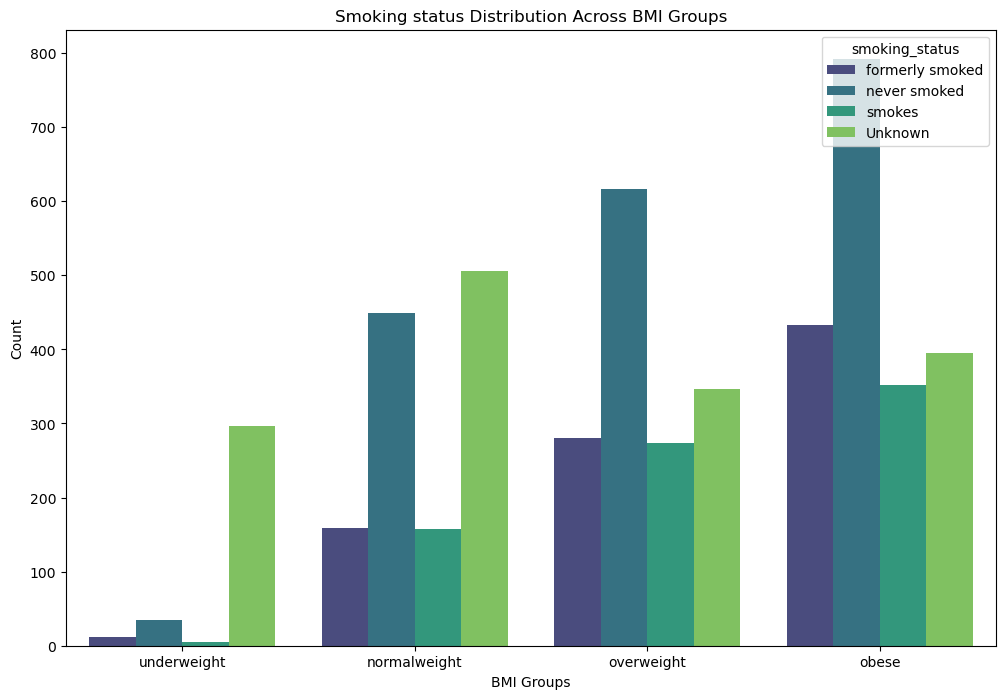

In [76]:
#Risk Factors Analysis
plt.figure(figsize=(12, 8))
sns.countplot(x='bmi_group', hue='smoking_status', data=data_clean, palette='viridis')
plt.title('Smoking status Distribution Across BMI Groups')
plt.xlabel('BMI Groups')
plt.ylabel('Count')
plt.legend(title='smoking_status', loc='upper right')
plt.show()

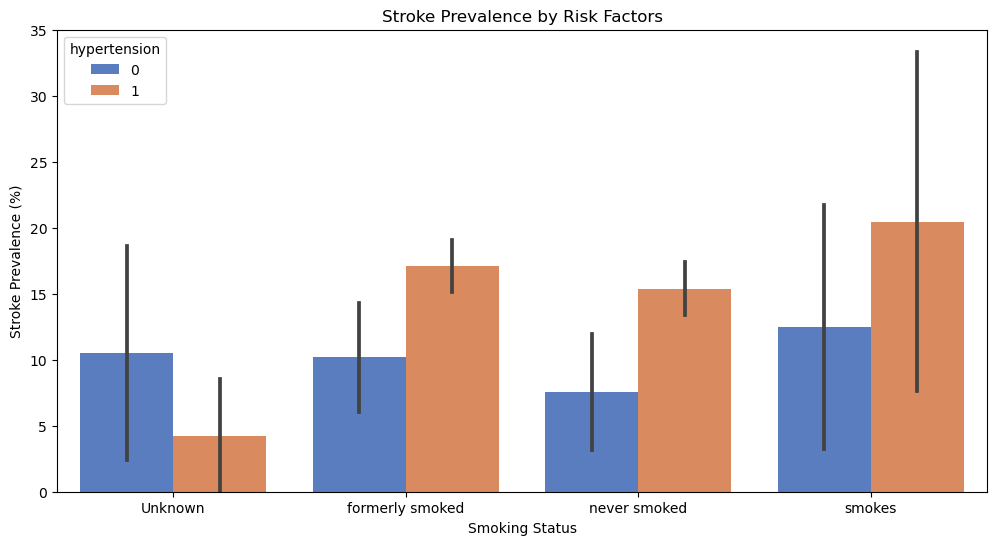

In [56]:
risk_factors_df = data_clean[['hypertension', 'heart_disease', 'smoking_status', 'stroke']]
risk_factors_grouped = risk_factors_df.groupby(['hypertension', 'heart_disease', 'smoking_status']).mean().reset_index()
risk_factors_grouped['stroke'] = risk_factors_grouped['stroke'] * 100  # Convert to percentage
plt.figure(figsize=(12, 6))
sns.barplot(x='smoking_status', y='stroke', hue='hypertension', data=risk_factors_grouped, palette='muted')
plt.title('Stroke Prevalence by Risk Factors')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Prevalence (%)')
plt.show()


#### BMI and Work Type and Residence Type

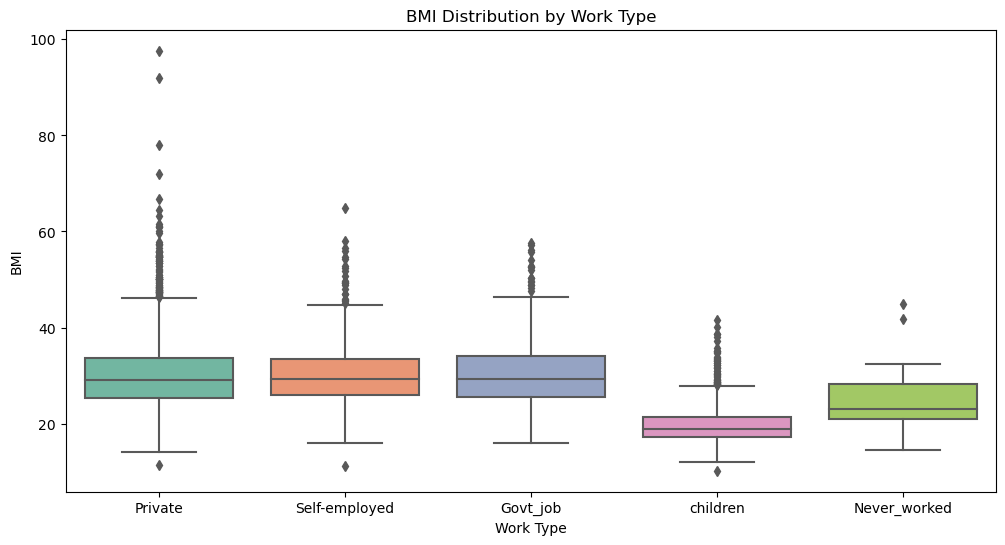

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='work_type', y='bmi', data=data_clean, palette='Set2')
plt.title('BMI Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('BMI')
plt.show()

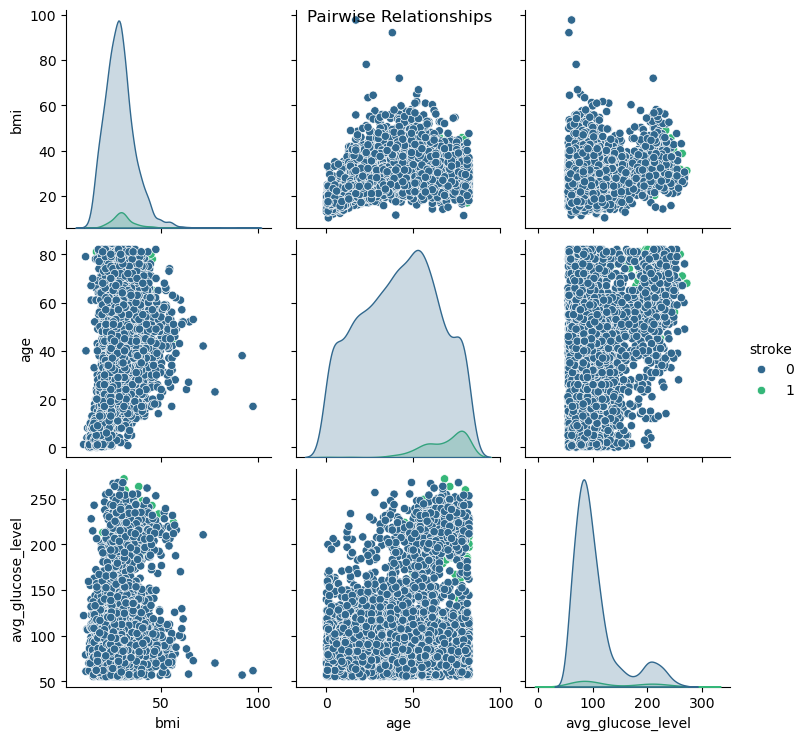

In [145]:
# Pair Plots
sns.pairplot(data_clean[['bmi', 'age', 'avg_glucose_level', 'stroke']], hue='stroke', palette='viridis')
plt.suptitle('Pairwise Relationships')
plt.show()

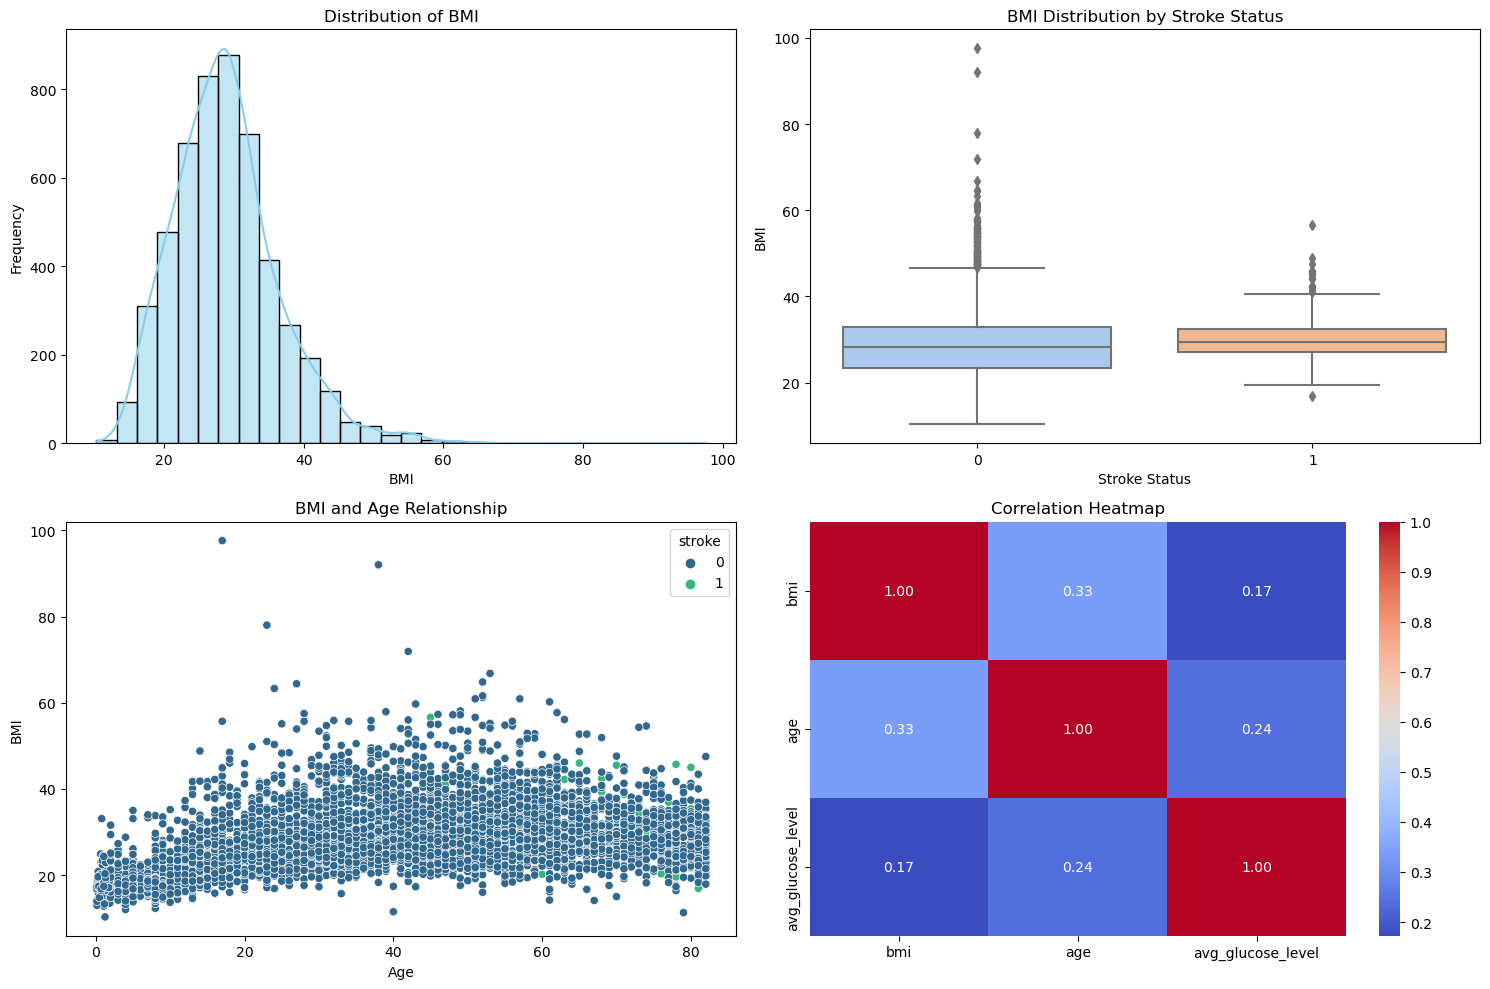

In [59]:
# Step 8: Multiple Perspectives (Dashboard example)
plt.figure(figsize=(15, 10))

# Subplot 1: Distribution of BMI
plt.subplot(2, 2, 1)
sns.histplot(data_clean['bmi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Subplot 2: BMI and Stroke Status
plt.subplot(2, 2, 2)
sns.boxplot(x='stroke', y='bmi', data=data_clean, palette='pastel')
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')

# Subplot 3: BMI and Age Relationship
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='bmi', hue='stroke', data=data_clean, palette='viridis')
plt.title('BMI and Age Relationship')
plt.xlabel('Age')
plt.ylabel('BMI')

# Subplot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

## Hypothesis Testing

### Null Hypothesis (H0): The mean BMI is the same for patients who had a stroke and those who did not.
### Alternative Hypothesis (H1): The mean BMI is different for patients who had a stroke compared to those who did not.

#### ?????this is so much like the titanic one. if it is a problem, I can change it to one-tail test with greater and less keywords. 

In [32]:
data_encoded['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='log_bmi', ylabel='Count'>

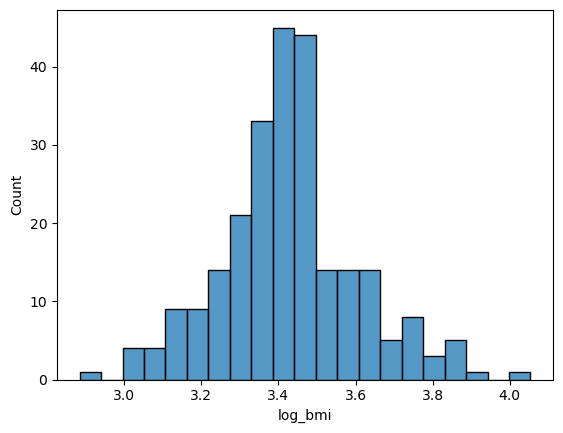

In [82]:
data_stroke = data_clean[data_clean['stroke']==1]['log_bmi']
sns.histplot(data_stroke)

In [83]:
#get sample
data_strokes = data_clean[data_clean['stroke']==1]
data_no_strokes = data_clean[data_clean['stroke']==0]
data_strokes.shape

(249, 19)

<Axes: xlabel='log_bmi', ylabel='Count'>

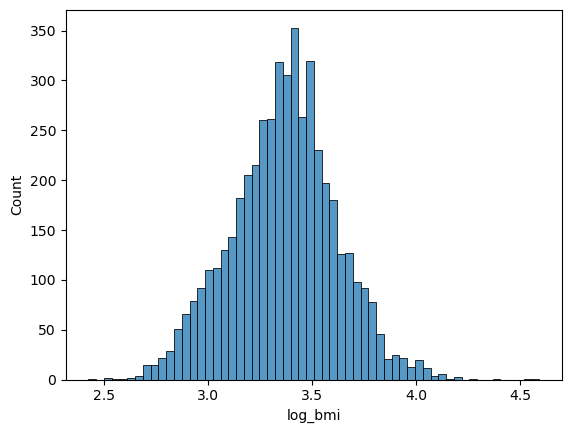

In [85]:
sns.histplot(data_no_strokes['log_bmi'])

In [86]:
N=100
sample_strokes = data_strokes.sample(n=100, random_state=42)
sample_no_strokes = data_no_strokes.sample(n=100, random_state=42)


### Set alpha (Let alpha = 0.05)

In [91]:
alpha = 0.05

In [87]:
# strokes_mean = sample_strokes['bmi'].mean()
# strokes_mean

30.423999999999996

In [39]:
# no_strokes_mean = sample_no_strokes['bmi'].mean()
# no_strokes_mean

27.603

### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [88]:
t, p = stats.ttest_ind(sample_strokes['log_bmi'],sample_no_strokes['log_bmi'])
print(t, p)

3.6156231366546305 0.0003801092961873743


In [20]:
#joint standard deviation


#sample_strokes_s = sample_strokes['bmi'].var(ddof=1)
#sample_no_strokes_s = sample_no_strokes['bmi'].var(ddof=1)
#s_joint = np.sqrt((sample_strokes_s + sample_no_strokes_s)/2)
#s_joint

6.273348911518995

In [24]:

#t = (strokes_mean - no_strokes_mean)/(s_joint*np.sqrt(2/N))
#t

3.1797182937880764

### Find the p-value


In [89]:

## Compare with the critical t-value
## Degrees of freedom
# df = 2*N - 2

# #p-value after comparison with the t
# if (t > 0):
#     p = 2*(1 - stats.t.cdf(t, df = df))
# else:
#     p = 2*stats.t.cdf(t, df = df)

# print(t, p)

3.6156231366546305 0.00038010929618725875


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [92]:
if p < alpha:
    print("We reject our null hypothesis.")
else:
    print("We fail to reject our null hypothesis.")

We reject our null hypothesis.


## Summary & Next steps